## imports

In [2]:
import pandas
import numpy
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import mysql.connector
import datetime
%matplotlib qt
# %matplotlib inline

## Database Connection and data Fetching

In [3]:
with open('../config.env') as f:
    credentials=f.read()
credentials=credentials.split(" ")
con = mysql.connector.connect(username=credentials[0],password=credentials[1],host=credentials[2],port=credentials[3],database=credentials[4])
query=con.cursor()

In [4]:
sql="SELECT * FROM total_india_cases"
query.execute(sql)
result=query.fetchall()
column=[columns[0] for columns in query.description]
india_data=pandas.DataFrame(result,columns=column)

In [5]:
india_data

,index_no,date,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,total_vaccinated2,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,613,2020-01-30,737454,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,614,2020-02-02,737457,2,2,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
2,615,2020-02-03,737458,3,3,0,0,0,0,0,...,3,3,0,0,0,0,0,0,0,0
3,616,2020-02-14,737469,3,0,3,0,0,0,0,...,0,-3,3,0,0,0,0,0,0,0
4,617,2020-03-02,737486,5,2,3,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1220,2021-10-26,738089,34214892,156336,33589700,455684,603207505,721557725,313767852,...,106567,-15547,119077,3000,8777615,20413094,23630200,13172,9,37
608,1221,2021-10-27,738090,34231243,154866,33606777,456418,604498405,723497151,317002722,...,104536,-17668,118586,3574,8756187,17828127,24133671,13182,10,44
609,1222,2021-10-28,738091,34245550,155174,33619966,457223,605885769,726445742,321755224,...,103069,-14258,113133,4147,8819288,17058938,25237448,13187,5,47
610,1223,2021-10-29,738092,34259765,155281,33633515,457774,607062619,728940103,325373874,...,100957,-12163,109046,4032,8631457,16526747,24758819,13195,8,42


In [6]:
sql="SELECT * FROM total_state_cases WHERE state_name='MH'"
query.execute(sql)
result=query.fetchall()
column=[columns[0] for columns in query.description]
maharashtra_data=pandas.DataFrame(result,columns=column)

In [7]:
maharashtra_data

,index_no,date,ordinal_date,state_name,total_confirmed,total_active,total_recovered,total_deaths,total_tested,total_vaccinated1,...,delta7_confirmed,delta7_active,delta7_recovered,delta7_deaths,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,52,2020-03-09,737493,MH,2,2,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
1,64,2020-03-10,737494,MH,5,5,0,0,0,0,...,5,5,0,0,0,0,0,0,0,0
2,76,2020-03-11,737495,MH,11,11,0,0,0,0,...,11,11,0,0,0,0,0,0,0,0
3,89,2020-03-12,737496,MH,14,14,0,0,0,0,...,14,14,0,0,0,0,0,0,0,0
4,102,2020-03-13,737497,MH,17,17,0,0,0,0,...,17,17,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,20925,2021-10-27,738090,MH,6606536,19480,6443342,140098,62202811,66397746,...,9891,-6248,15916,212,832421,2010496,1534138,3616,1,11
598,20961,2021-10-28,738091,MH,6607954,18748,6445454,140134,62316910,66658668,...,9736,-5544,15060,209,822820,1731722,1480512,3618,2,11
599,20997,2021-10-29,738092,MH,6609292,18465,6447038,140170,62439900,66908849,...,9442,-5673,14900,205,813601,1677329,1399884,3619,1,10
600,21033,2021-10-30,738093,MH,6609906,16905,6449186,140196,62559171,67145633,...,8355,-7117,15267,198,796208,1625770,1298054,3619,0,7


In [8]:
def get_district_data(districtname='Raigad'):
    sql="SELECT * FROM total_district_cases WHERE district_name='{}'".format(districtname)
    query.execute(sql)
    result=query.fetchall()
    column=[columns[0] for columns in query.description]
    district_data=pandas.DataFrame(result,columns=column)
    return district_data

raigad_data=get_district_data()
pune_data=get_district_data('Pune')
thane_data=get_district_data('Thane')
mumbai_data=get_district_data('Mumbai')

In [9]:
raigad_data

,index_no,date,ordinal_date,state_name,district_name,total_confirmed,total_active,total_recovered,total_deaths,delta_confirmed,...,delta7_deaths,total_vaccinated1,total_vaccinated2,delta_vaccinated1,delta_vaccinated2,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
0,19918,2020-04-26,737541,MH,Raigad,57,36,20,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20334,2020-04-27,737542,MH,Raigad,61,39,21,1,4,...,0,0,0,0,0,0,0,0,0,0
2,20759,2020-04-28,737543,MH,Raigad,66,44,21,1,5,...,0,0,0,0,0,0,0,0,0,0
3,21189,2020-04-29,737544,MH,Raigad,69,44,23,2,3,...,1,0,0,0,0,0,0,0,0,0
4,21623,2020-04-30,737545,MH,Raigad,71,44,24,3,2,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,400570,2021-10-27,738090,MH,Raigad,195812,639,190620,4546,39,...,8,1850609,758887,3536,4449,67903,36282,7,0,0
550,401318,2021-10-28,738091,MH,Raigad,195860,659,190648,4546,48,...,5,1853351,763345,2742,4458,28042,35389,7,0,0
551,402066,2021-10-29,738092,MH,Raigad,195919,662,190703,4547,59,...,6,1856154,767986,2803,4641,24312,33312,7,0,0
552,402814,2021-10-30,738093,MH,Raigad,195932,649,190725,4551,13,...,10,1859181,773699,3027,5713,22326,32055,7,0,0


In [10]:
# maindata=india_data


# maindata=maharashtra_data


maindata=raigad_data
# maindata=pune_data
# maindata=thane_data
# maindata=mumbai_data

In [11]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index_no            554 non-null    int64 
 1   date                554 non-null    object
 2   ordinal_date        554 non-null    int64 
 3   state_name          554 non-null    object
 4   district_name       554 non-null    object
 5   total_confirmed     554 non-null    int64 
 6   total_active        554 non-null    int64 
 7   total_recovered     554 non-null    int64 
 8   total_deaths        554 non-null    int64 
 9   delta_confirmed     554 non-null    int64 
 10  delta_active        554 non-null    int64 
 11  delta_recovered     554 non-null    int64 
 12  delta_deaths        554 non-null    int64 
 13  delta7_confirmed    554 non-null    int64 
 14  delta7_active       554 non-null    int64 
 15  delta7_recovered    554 non-null    int64 
 16  delta7_deaths       554 no

In [12]:
maindata.describe()

,index_no,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,delta_confirmed,delta_active,delta_recovered,delta_deaths,...,delta7_deaths,total_vaccinated1,total_vaccinated2,delta_vaccinated1,delta_vaccinated2,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,...,554.000000,5.540000e+02,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,203244.500000,737817.500000,89145.602888,3501.575812,83676.041516,1964.333935,353.611913,1.092058,344.294224,8.212996,...,57.436823,2.944939e+05,98023.911552,3350.709386,1395.427798,23403.929603,9640.545126,3.651625,0.012635,0.088448
std,112423.997546,160.070297,66271.043332,3246.577894,64891.437744,1489.285710,374.544641,298.692777,413.707825,14.204835,...,65.683364,4.904375e+05,191934.888848,7327.213620,3014.514155,38428.259290,17408.516613,2.511371,0.303421,0.838351
min,19918.000000,737541.000000,57.000000,36.000000,20.000000,1.000000,0.000000,-1706.000000,0.000000,-21.000000,...,-1.000000,0.000000e+00,0.000000,-444.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000
25%,105753.250000,737679.250000,39711.250000,824.500000,28680.750000,908.500000,85.500000,-80.000000,62.000000,0.000000,...,8.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,197478.000000,737817.500000,68447.500000,2803.000000,66211.500000,1524.500000,177.500000,7.500000,161.500000,3.000000,...,28.000000,1.667000e+03,0.000000,1.500000,0.000000,1536.000000,0.000000,2.000000,0.000000,0.000000
75%,300394.000000,737955.750000,157923.250000,5156.000000,150545.000000,3310.000000,517.000000,92.750000,547.250000,9.000000,...,90.750000,4.679005e+05,89422.250000,4076.750000,836.000000,34242.750000,10703.500000,7.000000,0.000000,0.000000
max,403562.000000,738094.000000,195958.000000,14889.000000,190759.000000,4551.000000,1918.000000,1291.000000,2931.000000,113.000000,...,333.000000,1.859507e+06,774913.000000,72621.000000,22549.000000,197113.000000,73238.000000,7.000000,3.000000,4.000000


In [13]:
maindata.corr()

,index_no,ordinal_date,total_confirmed,total_active,total_recovered,total_deaths,delta_confirmed,delta_active,delta_recovered,delta_deaths,...,delta7_deaths,total_vaccinated1,total_vaccinated2,delta_vaccinated1,delta_vaccinated2,delta7_vaccinated1,delta7_vaccinated2,total_other,delta_other,delta7_other
index_no,1.000000,0.999434,0.978120,-0.021054,0.977795,0.965199,0.145738,-0.066140,0.174933,0.138708,...,0.225227,0.803882,0.729963,0.552540,0.613761,0.746672,0.741224,0.554611,-0.001585,-0.002163
ordinal_date,0.999434,1.000000,0.973665,-0.013541,0.973000,0.959496,0.151035,-0.066265,0.179805,0.139127,...,0.225610,0.787009,0.712913,0.543157,0.601120,0.733543,0.725691,0.560933,-0.002997,-0.005612
total_confirmed,0.978120,0.973665,1.000000,-0.006686,0.998850,0.990134,0.131826,-0.108526,0.191422,0.182463,...,0.299000,0.831492,0.746124,0.564364,0.640907,0.761004,0.771772,0.536582,0.019816,0.052052
total_active,-0.021054,-0.013541,-0.006686,1.000000,-0.054562,-0.099443,0.875374,0.042433,0.747797,0.409618,...,0.587984,-0.216680,-0.270052,-0.092833,-0.177160,-0.124825,-0.221370,-0.383774,0.013898,0.031345
total_recovered,0.977795,0.973000,0.998850,-0.054562,1.000000,0.993186,0.090160,-0.110634,0.155893,0.162928,...,0.270877,0.840161,0.757326,0.567789,0.647905,0.765598,0.780594,0.553530,0.019022,0.050209
total_deaths,0.965199,0.959496,0.990134,-0.099443,0.993186,1.000000,0.029923,-0.101100,0.095687,0.127583,...,0.221014,0.864014,0.790910,0.575415,0.674244,0.776194,0.812208,0.593525,0.022565,0.059883
delta_confirmed,0.145738,0.151035,0.131826,0.875374,0.090160,0.029923,1.000000,0.238124,0.719052,0.418109,...,0.581824,-0.100837,-0.180852,0.008588,-0.092499,0.014531,-0.116396,-0.355907,0.006551,0.005028
delta_active,-0.066140,-0.066265,-0.108526,0.042433,-0.110634,-0.101100,0.238124,1.000000,-0.503091,-0.096057,...,-0.146653,-0.052977,-0.042264,-0.016941,-0.050851,-0.014838,-0.059234,-0.074910,-0.025493,-0.021993
delta_recovered,0.174933,0.179805,0.191422,0.747797,0.155893,0.095687,0.719052,-0.503091,1.000000,0.413457,...,0.609970,-0.053118,-0.130618,0.019097,-0.045511,0.023107,-0.061051,-0.261559,0.019447,0.018377
delta_deaths,0.138708,0.139127,0.182463,0.409618,0.162928,0.127583,0.418109,-0.096057,0.413457,1.000000,...,0.658532,0.001916,-0.075772,0.026596,-0.044754,0.022215,-0.045612,-0.192670,0.121047,0.051714


In [14]:
maindata.corr()['delta_confirmed']

index_no              0.145738
ordinal_date          0.151035
total_confirmed       0.131826
total_active          0.875374
total_recovered       0.090160
total_deaths          0.029923
delta_confirmed       1.000000
delta_active          0.238124
delta_recovered       0.719052
delta_deaths          0.418109
delta7_confirmed      0.952119
delta7_active         0.307458
delta7_recovered      0.816132
delta7_deaths         0.581824
total_vaccinated1    -0.100837
total_vaccinated2    -0.180852
delta_vaccinated1     0.008588
delta_vaccinated2    -0.092499
delta7_vaccinated1    0.014531
delta7_vaccinated2   -0.116396
total_other          -0.355907
delta_other           0.006551
delta7_other          0.005028
Name: delta_confirmed, dtype: float64

In [15]:
# maindata.value_counts()

<AxesSubplot:xlabel='date'>

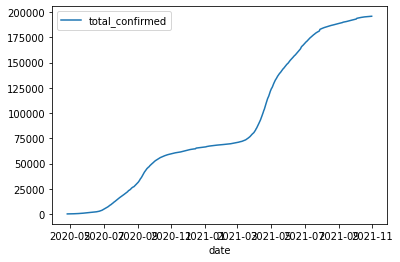

In [18]:
maindata.plot(kind='line',x='date',y='total_confirmed')

In [14]:
maindata.plot(kind='line',x='date',y='total_recovered')

<AxesSubplot:xlabel='date'>

In [15]:
maindata.plot(kind='kde',x='date',y='total_active')

<AxesSubplot:ylabel='Density'>

In [16]:
maindata.plot(kind='hist',x='date',y='total_deaths')

<AxesSubplot:ylabel='Frequency'>

In [17]:
maindata.plot(kind='kde',x='date',y='total_active')

<AxesSubplot:ylabel='Density'>

In [40]:
maindata.plot(kind='density',x='date',y='total_active')

<AxesSubplot:ylabel='Density'>

In [18]:
maindata.plot(kind='area',x='date',y='total_active')

<AxesSubplot:xlabel='date'>

In [19]:
maindata.plot(kind='pie',x='date',y='total_active')

<AxesSubplot:ylabel='total_active'>

In [20]:
maindata.plot(kind='scatter',x='date',y='total_active')

<AxesSubplot:xlabel='date', ylabel='total_active'>

In [21]:
maindata.plot(kind='box',x='date',y=['delta_confirmed'])

<AxesSubplot:>

In [22]:
maindata.plot(kind='barh',x='date',y=['delta_confirmed'])

<AxesSubplot:ylabel='date'>

In [23]:
maindata.plot(kind='line',x='date',y=['total_confirmed','total_recovered','total_active','total_deaths'])

<AxesSubplot:xlabel='date'>

In [21]:
maindata.plot(kind='line',x='date',y=['delta_confirmed','delta_recovered','delta_active'])

<AxesSubplot:xlabel='date'>

In [22]:
maindata.plot(kind='line',x='date',y=['delta_vaccinated1','delta_vaccinated2'])

<AxesSubplot:xlabel='date'>

In [23]:
maindata.plot(kind='bar',x='date',y=['delta_confirmed','delta_recovered'])

<AxesSubplot:xlabel='date'>

In [24]:
maindata.plot(kind='line',x='date',y=['delta7_confirmed','delta7_recovered','delta7_active'])

<AxesSubplot:xlabel='date'>

In [42]:
maindata.plot(kind='line',x='date',y=['delta_confirmed','delta_tested'])

In [ ]:
maindata.plot(kind='line',x='date',y=['delta_vaccinated1','delta_vaccinated2'])

In [24]:
maindata.plot(kind='line',x='date',y=['delta_confirmed','delta_recovered','delta_active','delta_vaccinated1'])

<AxesSubplot:xlabel='date'>